In [233]:
#importing liraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

#after this to remove error message in terminal we put "conda install jupyter ipywidgets"
  

In [234]:
# jeśli w taki sposób tworzymy nowy dataset, mają one to samo id 
# co sprawia, że jak robimy zmiany w jednym z nich będą one też widoczne w drugim
df_orginal = df

In [235]:
id(df)

2904697266832

In [236]:
id(df_orginal)

2904697266832

In [237]:
# gdy uzyjemy metody copy to wtedy df beda mialy inne id 
# zmiany wprowadzone w jednym nie beda widoczne w drugim 
df_alt = df.copy()


In [238]:
id(df_alt)  == id(df)

False

In [239]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [241]:
median_salary_year = df['salary_year_avg'].median()
median_salary_hour = df['salary_hour_avg'].median()

In [242]:
df_f = df
df_f['salary_year_avg']= df_f['salary_year_avg'].fillna(median_salary_year)
df_f['salary_hour_avg']= df_f['salary_hour_avg'].fillna(median_salary_hour)

In [243]:
df_f.loc[:10,'salary_year_avg':'salary_hour_avg']


,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [244]:
df_uni= df_f
df_uni= df_uni.drop_duplicates()

print('Len of original df: ', len(df_f))
print('Len of uni df: ', len(df_uni))
print('Len diffrence: ', len(df_f)-len(df_uni))

Len of original df:  785741
Len of uni df:  785640
Len diffrence:  101


In [245]:
df_uni= df_uni.drop_duplicates(subset=['job_title','company_name'])

print('Len of original df: ', len(df_f))
print('Len of uni df: ', len(df_uni))
print('Len diffrence: ', len(df_f)-len(df_uni))

Len of original df:  785741
Len of uni df:  508042
Len diffrence:  277699


In [246]:
df.head(3)
#df.tail(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [247]:
df.sample(2, random_state=42)
#dodanie random_state powoduje, że za każdym razem są
# te same wiersze pokazane

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,115000.0,45.98,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra..."
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,115000.0,45.98,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu..."


In [248]:
df_altered = df_original

In [249]:
df_altered.loc[:,"salary_year_avg"]

0         115000.0
1         115000.0
2         115000.0
3         115000.0
4         115000.0
            ...   
785736    115000.0
785737    115000.0
785738    115000.0
785739    115000.0
785740    115000.0
Name: salary_year_avg, Length: 785741, dtype: float64

In [250]:
df_altered.loc[:5,"salary_year_avg"]

0    115000.0
1    115000.0
2    115000.0
3    115000.0
4    115000.0
5    115000.0
Name: salary_year_avg, dtype: float64

In [251]:
median_sal = df_altered['salary_year_avg'].median()
df_altered['salary_year_avg'] = df_altered['salary_year_avg'].fillna(median_sal)

In [252]:
id(df_orginal)


2904697266832

In [253]:
id(df)

2904697266832

In [254]:
df_alt.pivot_table(values= 'salary_year_avg',index="job_country", columns='job_title_short',aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


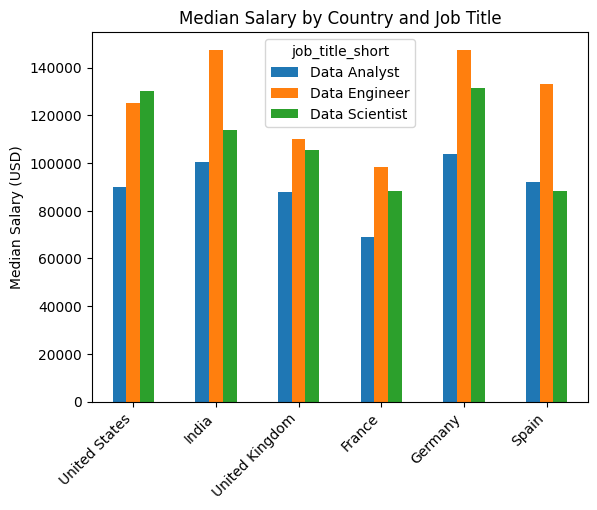

In [255]:
top_countries = df_alt['job_country'].value_counts().head(6).index

#print(top_countries)

df_alt_job_country_salary = df_alt.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns = 'job_title_short',
    aggfunc='median'

)

df_alt_job_country_salary = df_alt_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_alt_job_country_salary = df_alt_job_country_salary[job_titles]

df_alt_job_country_salary.plot(kind='bar')

plt.title('Median Salary by Country and Job Title')
plt.ylabel('Median Salary (USD)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [256]:
#df_alt.index
df_alt.index.name = 'job_index' # nadanie nazwy kolumnie indexującej
df_alt

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"


In [257]:
df_alt.index.dtype

dtype('int64')

In [258]:
df_usa = df_alt[df_alt['job_country']=='United States']
df_usa.reset_index(inplace = True)
df_usa

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [259]:
df_usa.set_index('job_index', inplace=True) 
#using this metod możemy wybrać kolumne ktora ma być indexem
# to powoduje, że jeśli mieliśmy inne kolumny indexowe zostaną one utracone

In [260]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"


In [261]:
#median_pivot.sort_index(inplace = True)


#mozna uzyc do sortowania np pivota po indexie
# bo w pivocie indexem jest kolumna którą wybraliśmy żeby była indexem
# czyli pierwsza kolumna

In [262]:
df_pol = df[df['job_country']=="Poland"].copy()
df_pol

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,115000.0,45.98,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau..."
108,Data Engineer,Chapter Lead Data Engineers Poland,"Wrocław, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-16 13:58:03,False,False,Poland,None,115000.0,45.98,Volvo Group,"['azure', 'excel', 'unity']","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
125,Data Engineer,Data Engineer,"Kraków, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-04 14:12:20,True,False,Poland,None,115000.0,45.98,SII Group,"['sql', 'shell', 'python', 'aws']","{'cloud': ['aws'], 'programming': ['sql', 'she..."
136,Data Scientist,Mid/ Senior Data Scientist with NLP,Anywhere,via LinkedIn,Full-time,True,Poland,2023-12-21 13:10:55,False,False,Poland,None,115000.0,45.98,Trans.eu Group,"['python', 'sql', 'snowflake', 'aws', 'scikit-...","{'cloud': ['snowflake', 'aws'], 'libraries': [..."
351,Software Engineer,Data Platform Software Engineer,"Warsaw, Poland",via Adzuna.pl,Full-time,False,Poland,2023-06-23 13:58:41,True,False,Poland,None,115000.0,45.98,IBM,"['python', 'sql', 'shell', 'ibm cloud', 'linux']","{'cloud': ['ibm cloud'], 'os': ['linux'], 'pro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785549,Data Scientist,Data Scientist,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:55,False,False,Poland,None,115000.0,45.98,Citi,"['python', 'r']","{'programming': ['python', 'r']}"
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,115000.0,45.98,Citi,None,None
785650,Software Engineer,Integration Analyst,"Łódź, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-26 06:24:52,False,False,Poland,None,115000.0,45.98,Team Quest,"['sql', 'oracle', 'aws', 'sap', 'atlassian']","{'analyst_tools': ['sap'], 'cloud': ['oracle',..."
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,115000.0,45.98,Digital Hub Warsaw At Bayer,"['python', 'aws', 'gcp', 'azure', 'tensorflow'...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'..."


In [263]:
df_pol['job_posted_month'] = df_pol['job_posted_date'].dt.month_name()
#df_pol['month_number']=df_pol['job_posted_date'].dt.month
df_pol

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,115000.0,45.98,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",October
108,Data Engineer,Chapter Lead Data Engineers Poland,"Wrocław, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-16 13:58:03,False,False,Poland,None,115000.0,45.98,Volvo Group,"['azure', 'excel', 'unity']","{'analyst_tools': ['excel'], 'cloud': ['azure'...",January
125,Data Engineer,Data Engineer,"Kraków, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-04 14:12:20,True,False,Poland,None,115000.0,45.98,SII Group,"['sql', 'shell', 'python', 'aws']","{'cloud': ['aws'], 'programming': ['sql', 'she...",June
136,Data Scientist,Mid/ Senior Data Scientist with NLP,Anywhere,via LinkedIn,Full-time,True,Poland,2023-12-21 13:10:55,False,False,Poland,None,115000.0,45.98,Trans.eu Group,"['python', 'sql', 'snowflake', 'aws', 'scikit-...","{'cloud': ['snowflake', 'aws'], 'libraries': [...",December
351,Software Engineer,Data Platform Software Engineer,"Warsaw, Poland",via Adzuna.pl,Full-time,False,Poland,2023-06-23 13:58:41,True,False,Poland,None,115000.0,45.98,IBM,"['python', 'sql', 'shell', 'ibm cloud', 'linux']","{'cloud': ['ibm cloud'], 'os': ['linux'], 'pro...",June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785549,Data Scientist,Data Scientist,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:55,False,False,Poland,None,115000.0,45.98,Citi,"['python', 'r']","{'programming': ['python', 'r']}",January
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,115000.0,45.98,Citi,None,None,January
785650,Software Engineer,Integration Analyst,"Łódź, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-26 06:24:52,False,False,Poland,None,115000.0,45.98,Team Quest,"['sql', 'oracle', 'aws', 'sap', 'atlassian']","{'analyst_tools': ['sap'], 'cloud': ['oracle',...",April
785669,Machine Learning Engineer,Senior Machine Learning Engineer,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-06-07 06:18:29,False,False,Poland,None,115000.0,45.98,Digital Hub Warsaw At Bayer,"['python', 'aws', 'gcp', 'azure', 'tensorflow'...","{'cloud': ['aws', 'gcp', 'azure'], 'libraries'...",June


In [264]:
df_pol_pivot=df_pol.pivot_table(
    index='job_posted_month',
    columns='job_title_short',
    aggfunc='size'
)

In [268]:
df_pol_pivot.reset_index(inplace=True)
df_pol_pivot['month_number2']=pd.to_datetime(df_pol_pivot['job_posted_month'],format='%B').dt.month

In [269]:
df_pol_pivot.sort_values('month_number2', inplace=True)
df_pol_pivot.set_index('job_posted_month', inplace =True)
df_pol_pivot.drop(columns='month_number2', inplace=True)
df_pol_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,182,53,505,501,313,48,78,143,94,165
February,157,33,395,393,160,43,58,122,46,142
March,112,55,336,379,174,35,57,108,50,303
April,148,42,283,364,140,43,44,92,45,276
May,80,21,245,220,107,26,63,96,42,133
June,92,16,209,246,132,44,36,93,44,93
July,119,36,258,252,141,38,43,109,43,164
August,101,56,310,340,173,42,68,127,70,225
September,53,14,142,200,89,42,30,86,21,73


In [276]:
top_3=df_pol['job_title_short'].value_counts().head(3)
top_3=top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

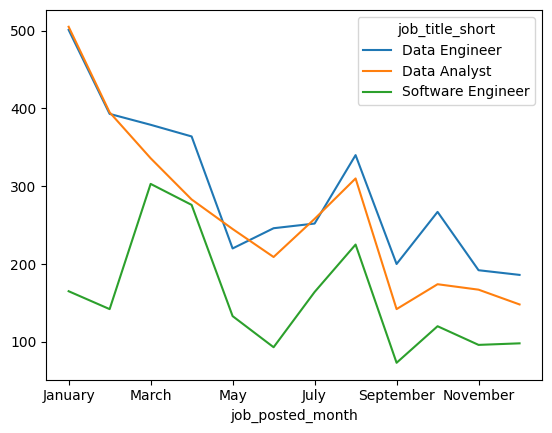

In [278]:
df_pol_pivot[top_3].plot(kind="line")